In [84]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv("car_pr.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [86]:
df.shape

(19237, 18)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [88]:
df.duplicated().sum()

313

1. There are duplicate values
2. Must be dropped 

In [89]:
df.drop_duplicates(inplace= True)

In [90]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

- No Null Values

#### Check the number of unique values of each column

In [91]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [92]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


#### Let's start checking the unique values for each column

In [93]:
for col in df.columns:
    print(f'Category in {col} is :\n {df[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


#### Lets drop some unnecessary columns which will not give such value to the model

In [94]:
df=df.drop(['ID','Doors'],axis='columns')

### Levy

- we need to replacing '-' with 0, to convert the type of this column to float

In [47]:
df['Levy']=df['Levy'].replace('-','0')

df['Levy'] = df['Levy'].astype('float64')

In [96]:
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']
df = df.drop('Prod. year',axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10


### Mileage

- we need to strip 'km' in them, and convert the type of this column to integer

In [97]:
df['Mileage'] =df['Mileage'].str.replace('km',"")

df.Mileage = df.Mileage.astype('Int64')

#### Same with other columns

In [98]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

df['Engine volume'] = df['Engine volume'].astype('float64')

In [99]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,10


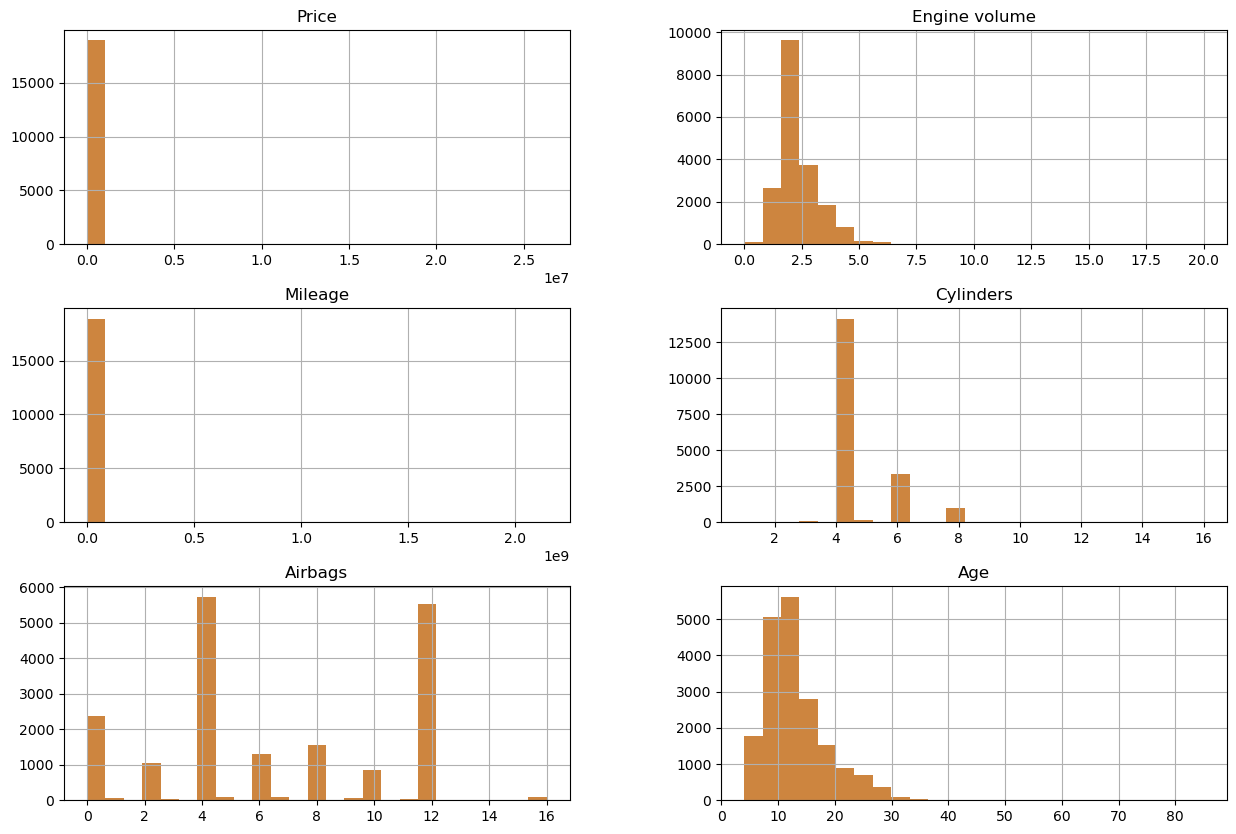

In [100]:
df.hist(bins=25,figsize=(15,10),color='peru')
plt.show()

#### we found:🔎
1. - in Levy column: Most values between more than 0 and less than 2000


2. - Most Engine valume in range (1 to 5)


3. - Mileage for most cars are 0.0 (most cars are new)


4. - in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

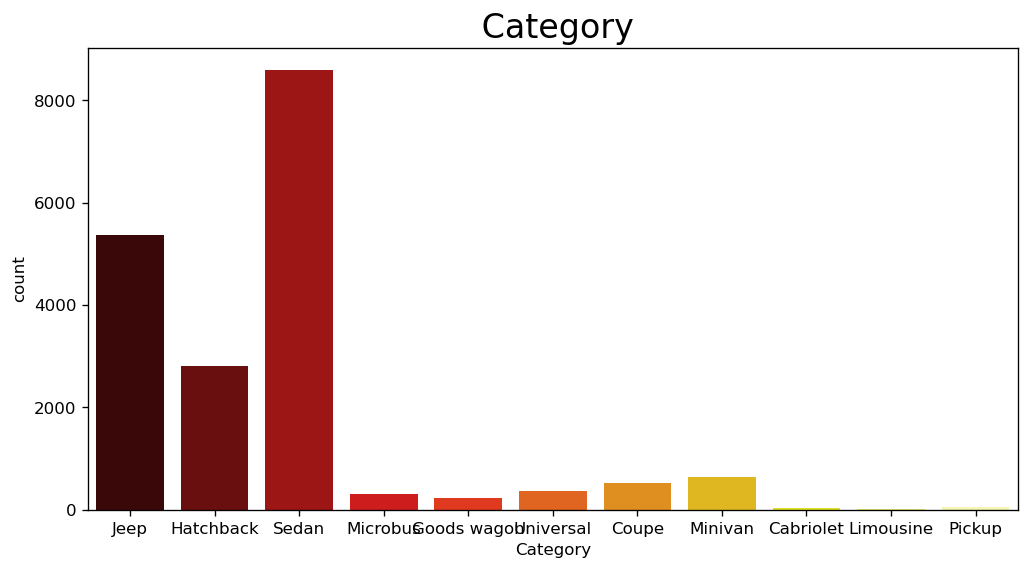

In [101]:
plt.subplots(figsize=(10,5), dpi=120)
sns.countplot(data= df, x='Category',palette='hot')
plt.title(" Category",fontsize=20)
plt.show()

The majority of category are of Sedan , Jeep and Hetchback

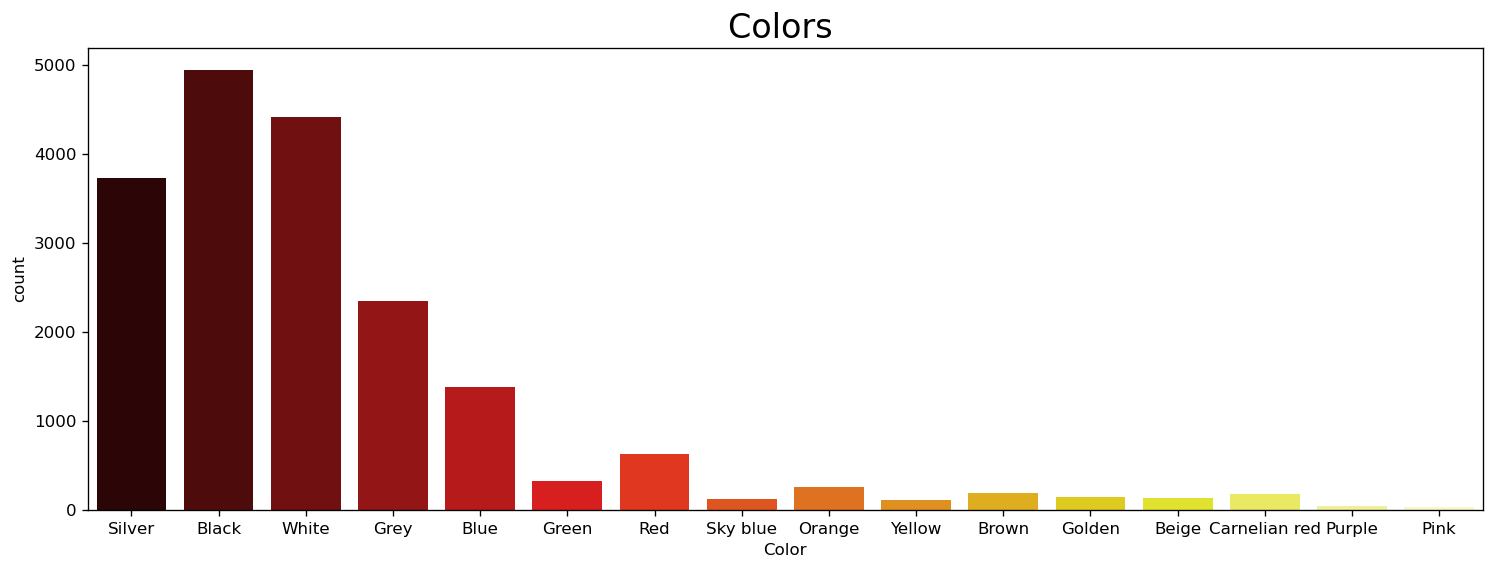

In [102]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Color',palette='hot')
plt.title("Colors ",fontsize=20)
plt.show()

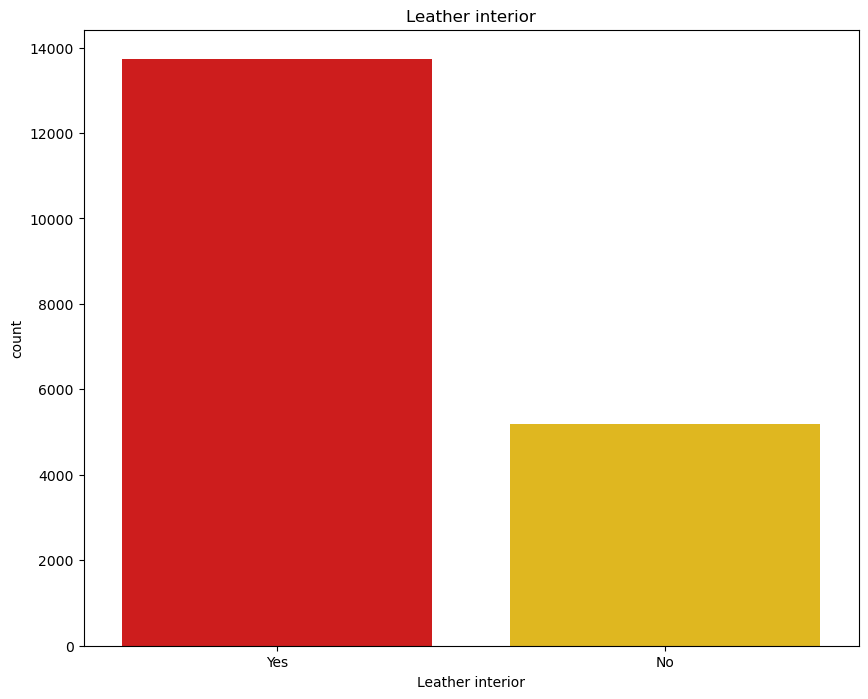

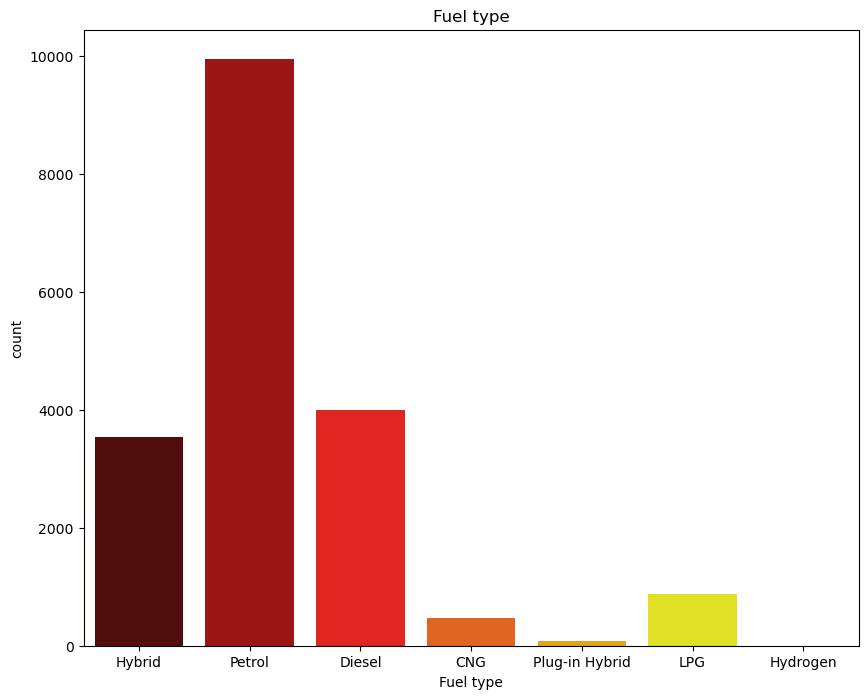

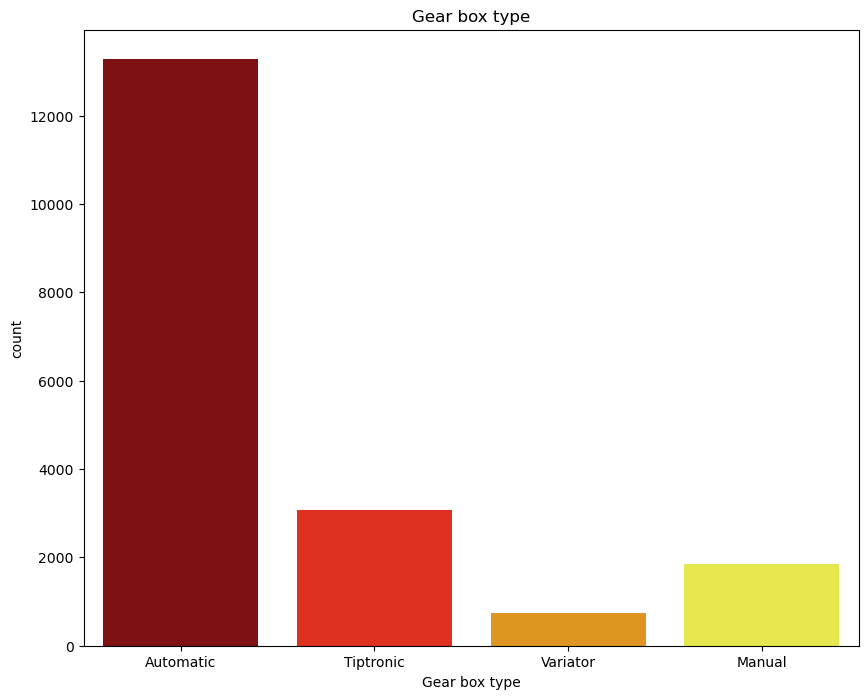

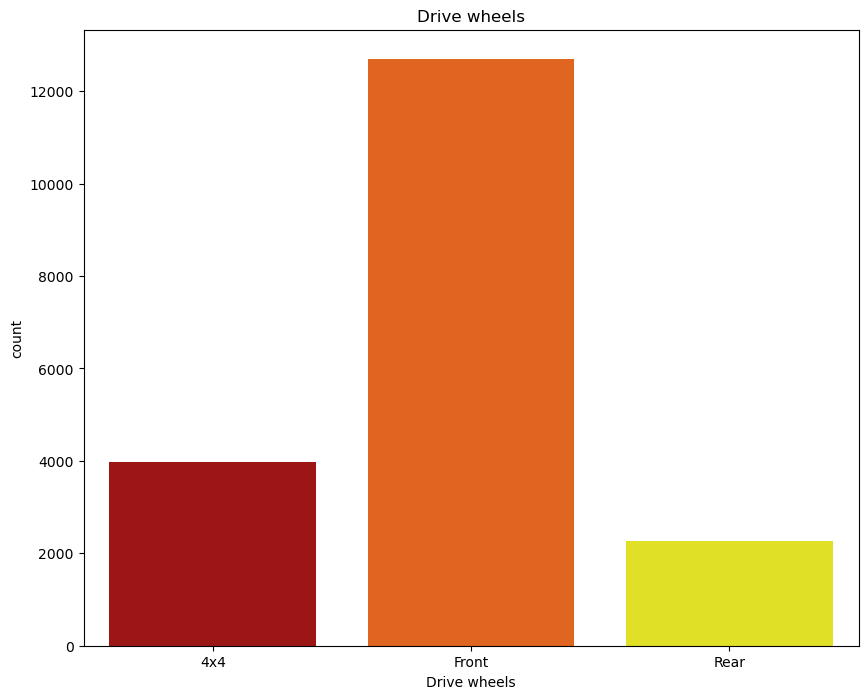

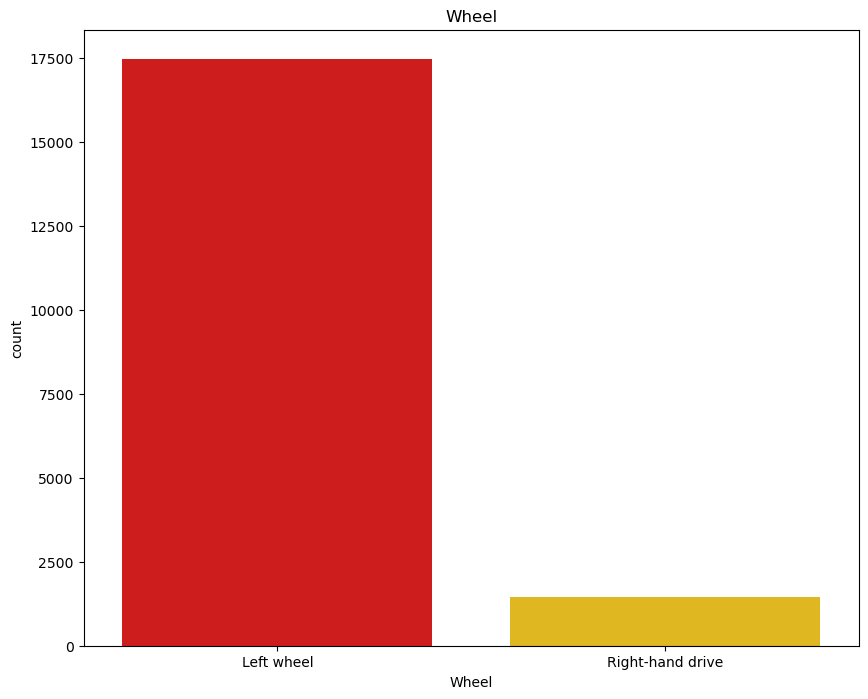

In [103]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col,palette='hot')
    plt.title(col)
    plt.show()


In [104]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

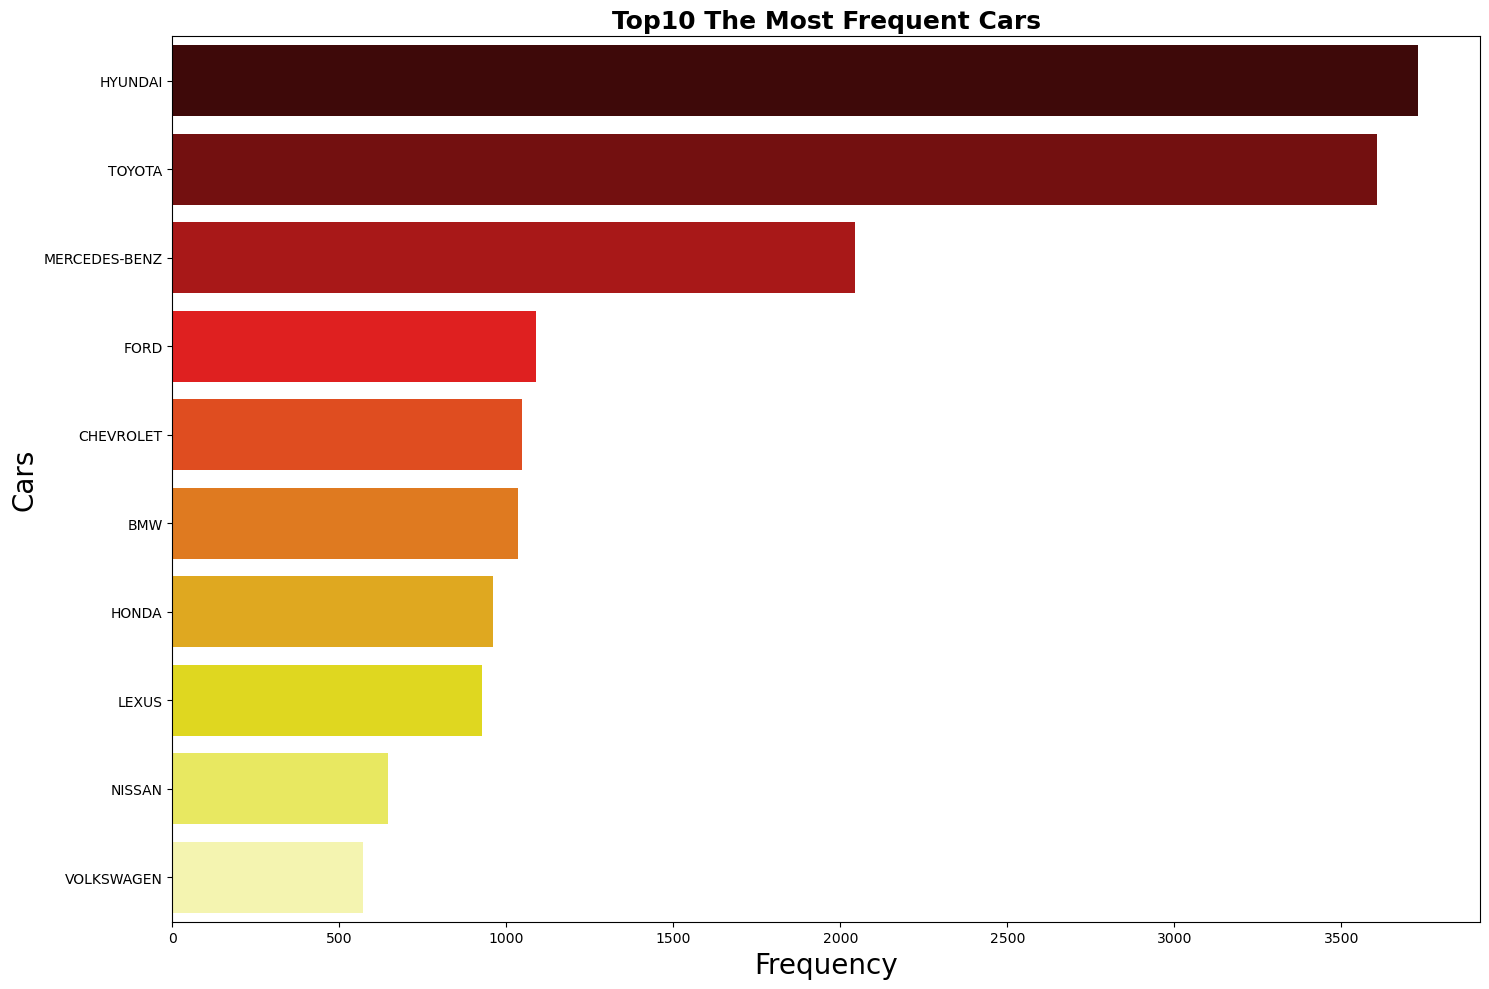

In [105]:
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='Price', ylabel='Levy'>

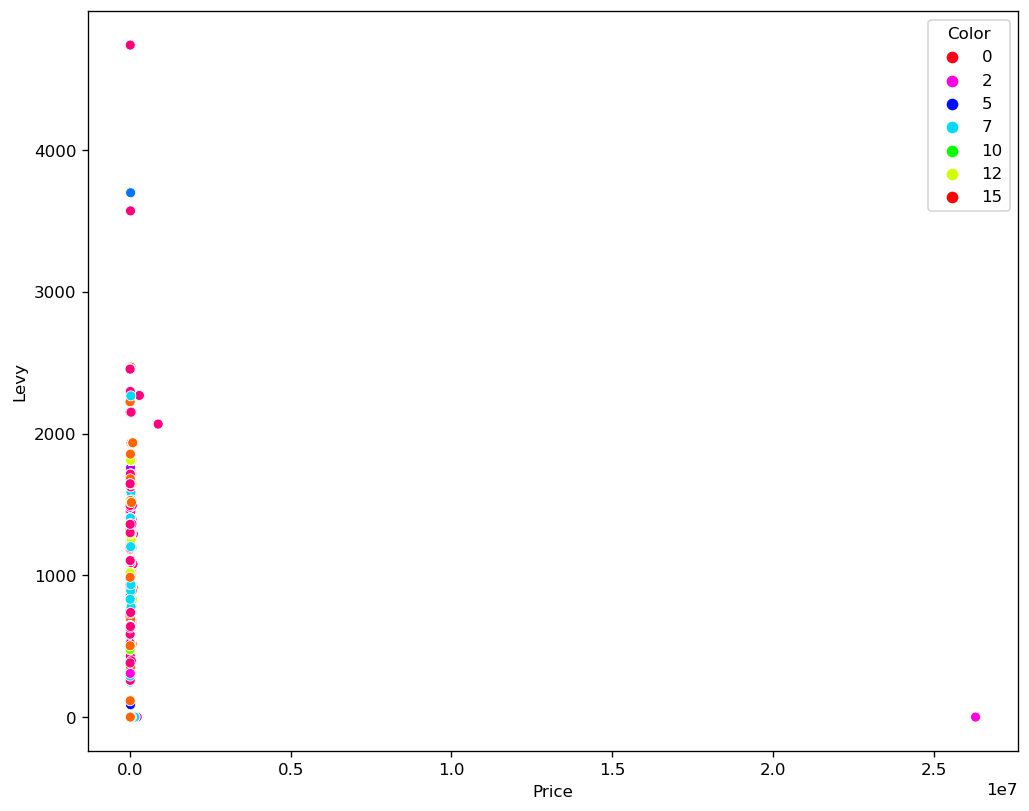

In [109]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=data, x='Price', y='Levy', hue="Color", palette="hsv_r")

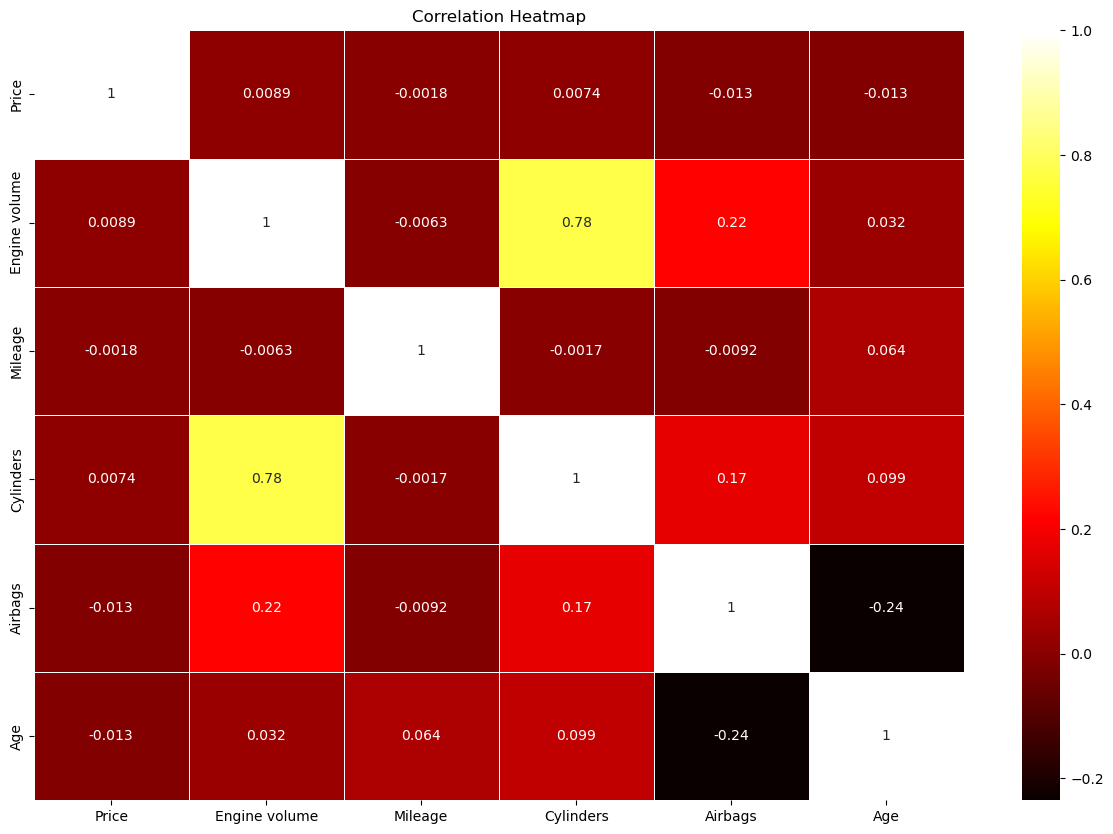

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

In [111]:
numeric_data = df.select_dtypes(exclude=object)

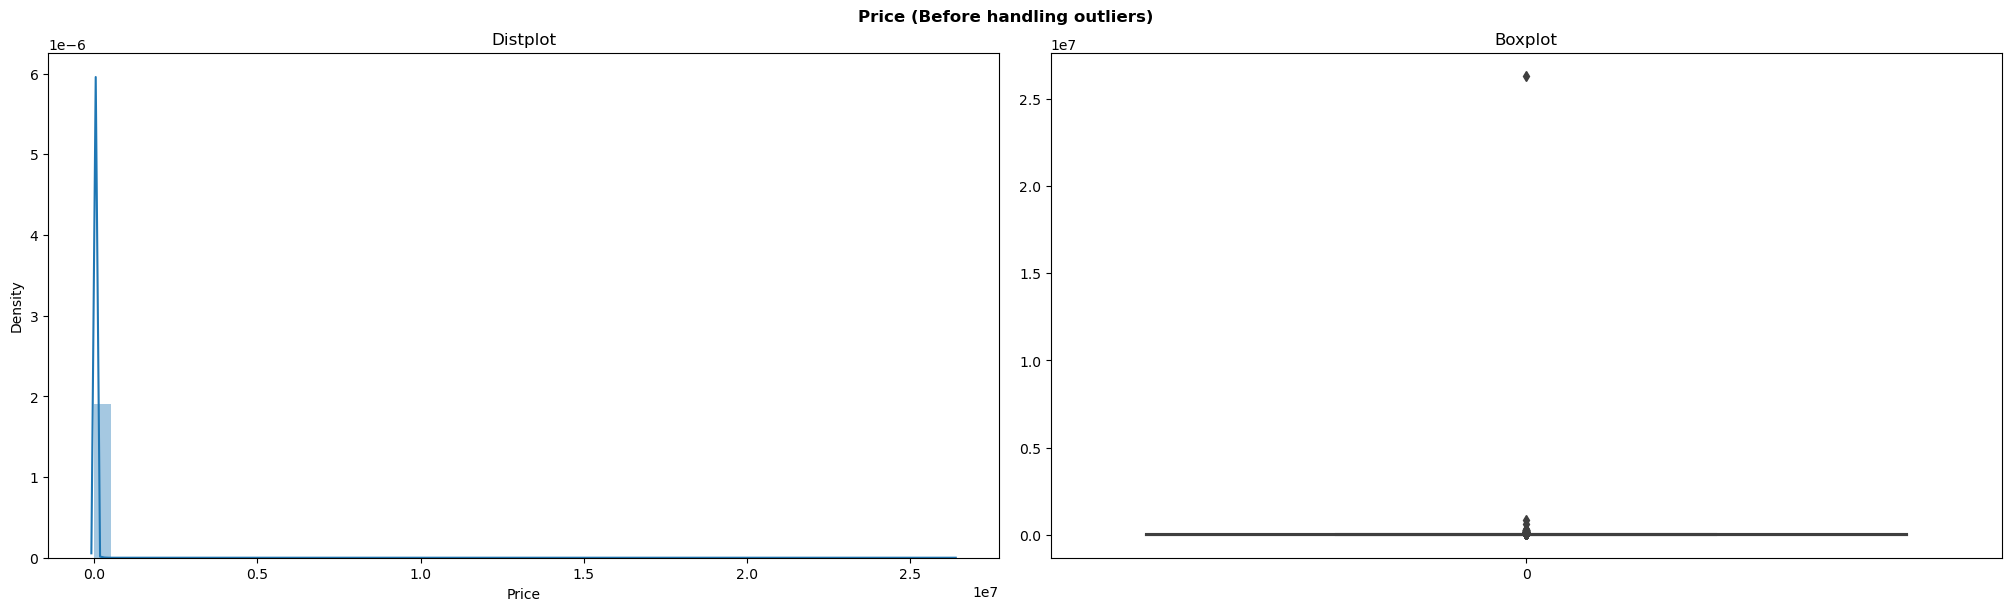

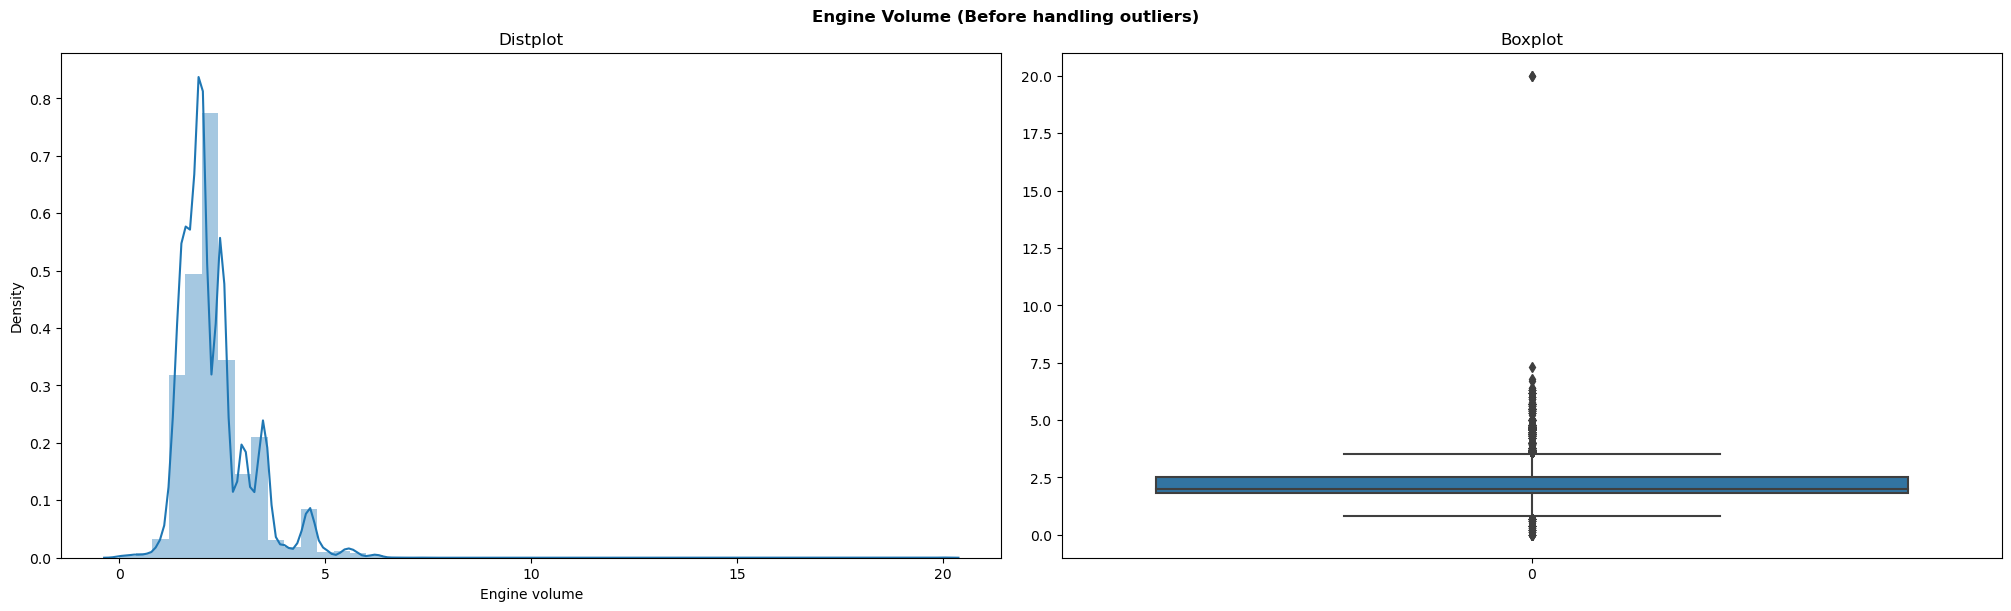

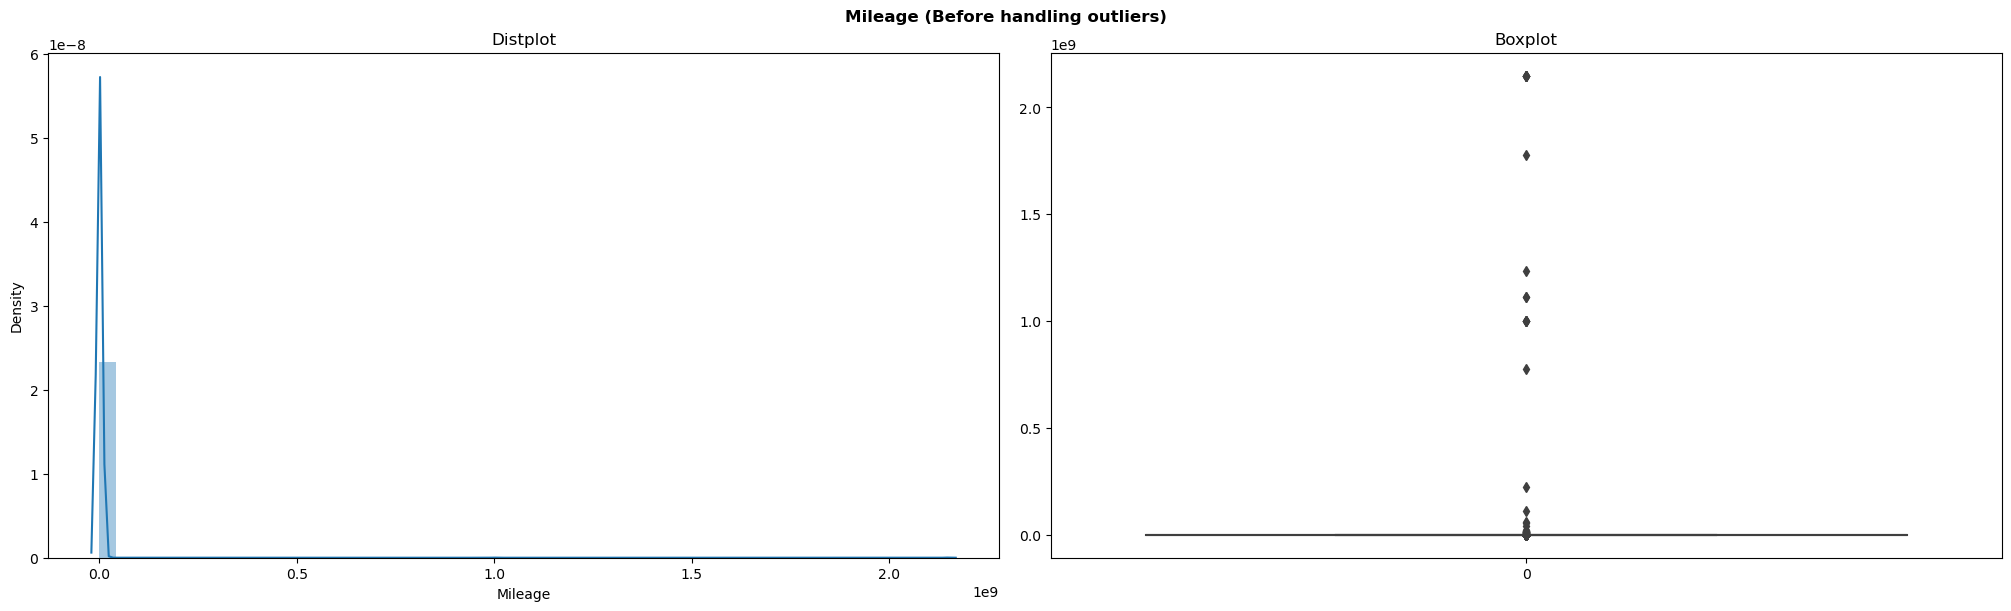

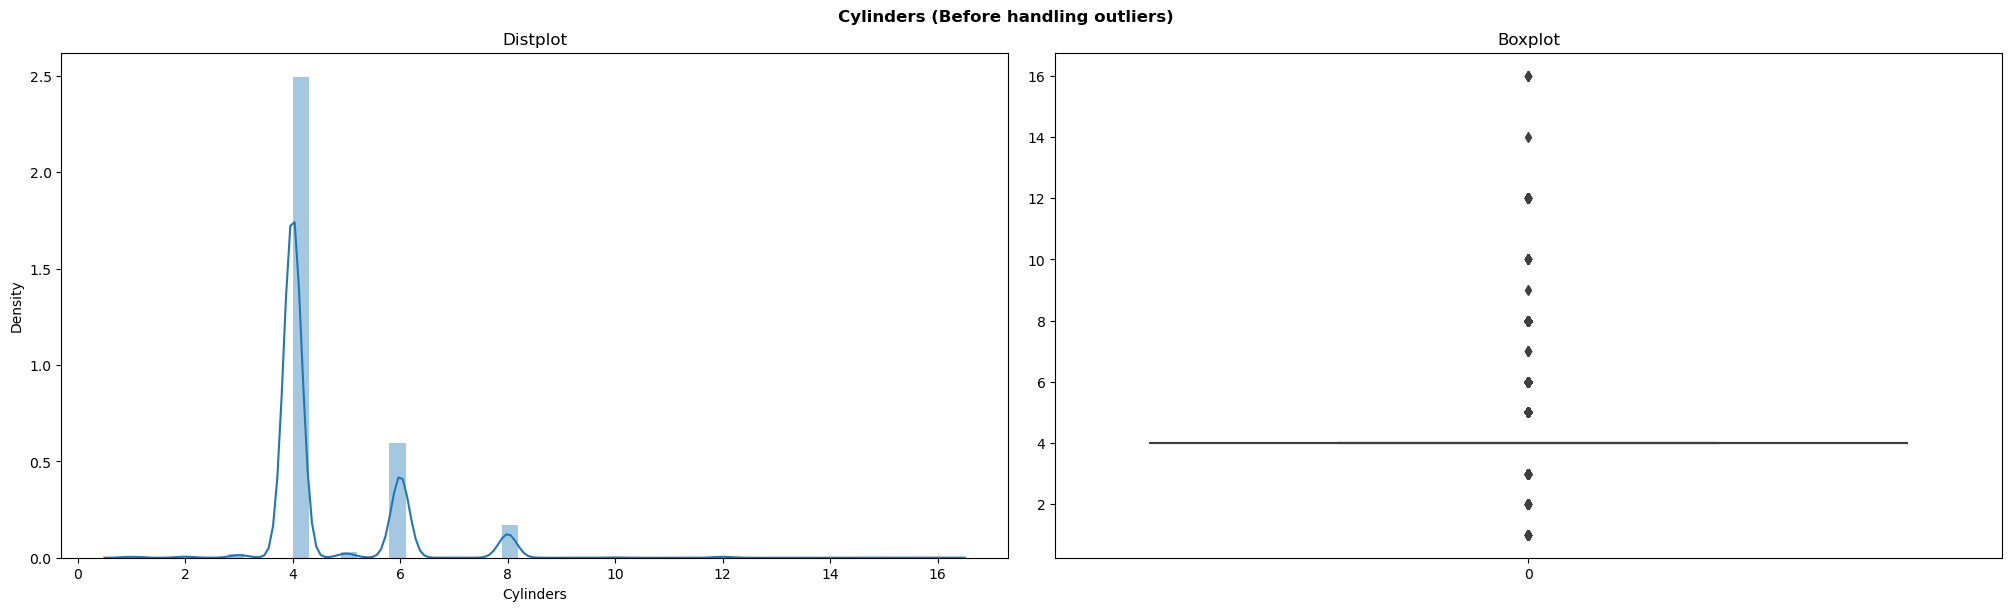

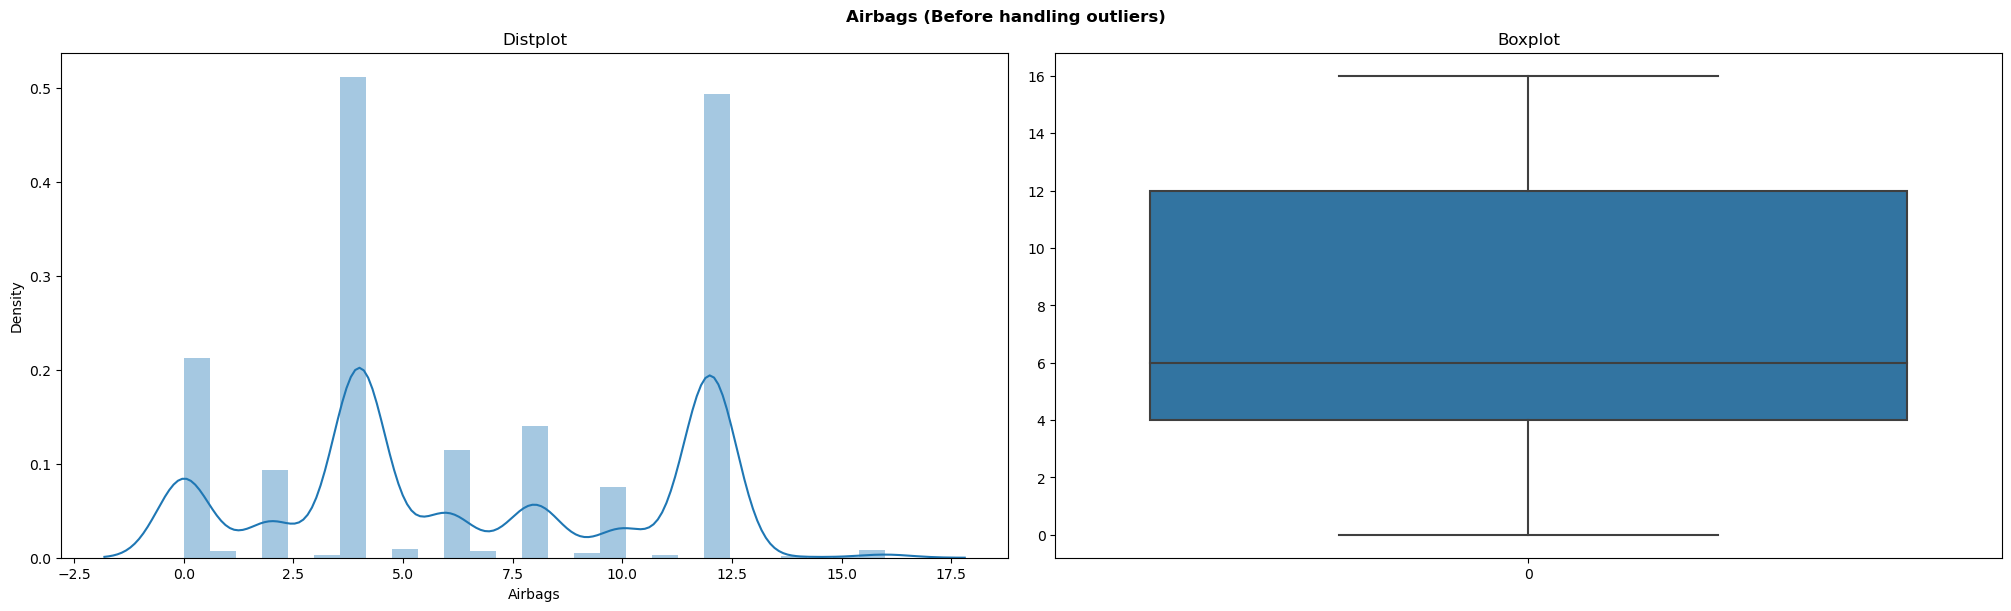

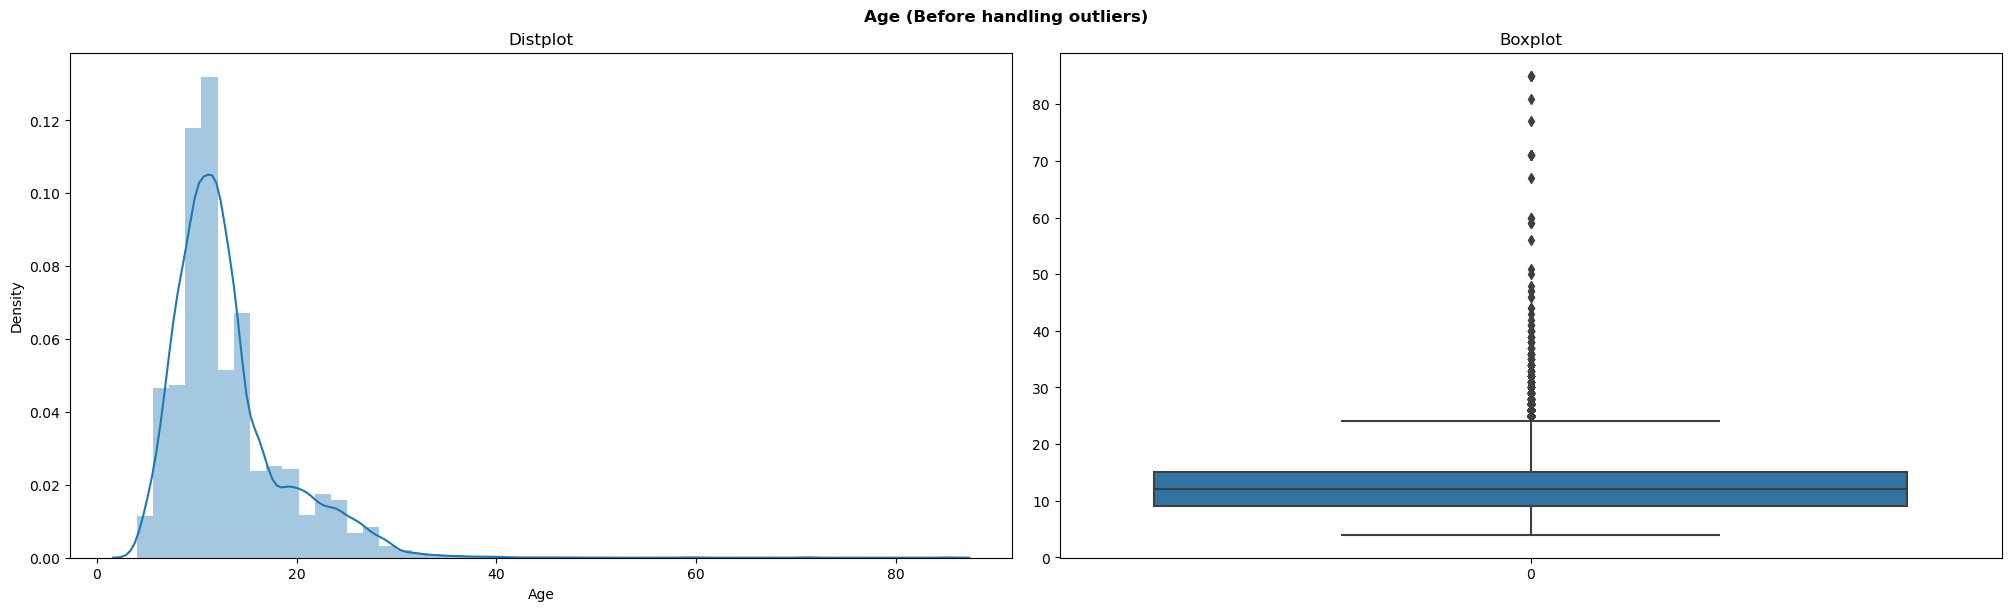

In [112]:
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(df[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [113]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2
    
    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")

Total Outliers in Price are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [114]:
if outlier>0:
    data = df.loc[(df[col]<=high) & (df[col]>=low) ]

In [115]:
obdata = data.select_dtypes(include=object)
numdata = data.select_dtypes(exclude=object)

In [116]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i]) 

In [117]:
data = pd.concat([obdata,numdata],axis=1)
data.head()

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Engine volume,Mileage,Cylinders,Airbags,Age
15,3,30,23,3,1,3,0,1,0,14,549,2.0,74146,4.0,12,6
36,2,30,24,3,0,3,2,1,0,11,51746,2.0,10200,4.0,12,5
56,0,19,80,3,1,3,2,0,0,7,87112,2.0,5323,4.0,0,5
59,63,4,53,7,0,3,0,1,0,11,23521,1.4,22000,4.0,6,6
81,65,30,180,7,1,3,0,1,0,14,7527,1.5,27656,4.0,12,5


### Model

In [118]:
X= data.drop('Price',axis=1)
y= data['Price']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [120]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [121]:
def models(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(X_test,y_test)
    print(f'The Score of Model is :{score}')

In [122]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [123]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of Model is :0.44537985334685903
The Score of Model is :0.1539864178720748
The Score of Model is :0.682751979958309
The Score of Model is :0.5298089893538633
The Score of Model is :-0.06171083857227133


In [124]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.445380,26602.048022
1,DecisionTreeClassifier,0.153986,32855.336546
2,RandomForestClassifier,0.682752,20119.478179
3,GradientBoostingRegressor,0.529809,24493.701076
4,SVR,-0.061711,36806.148830


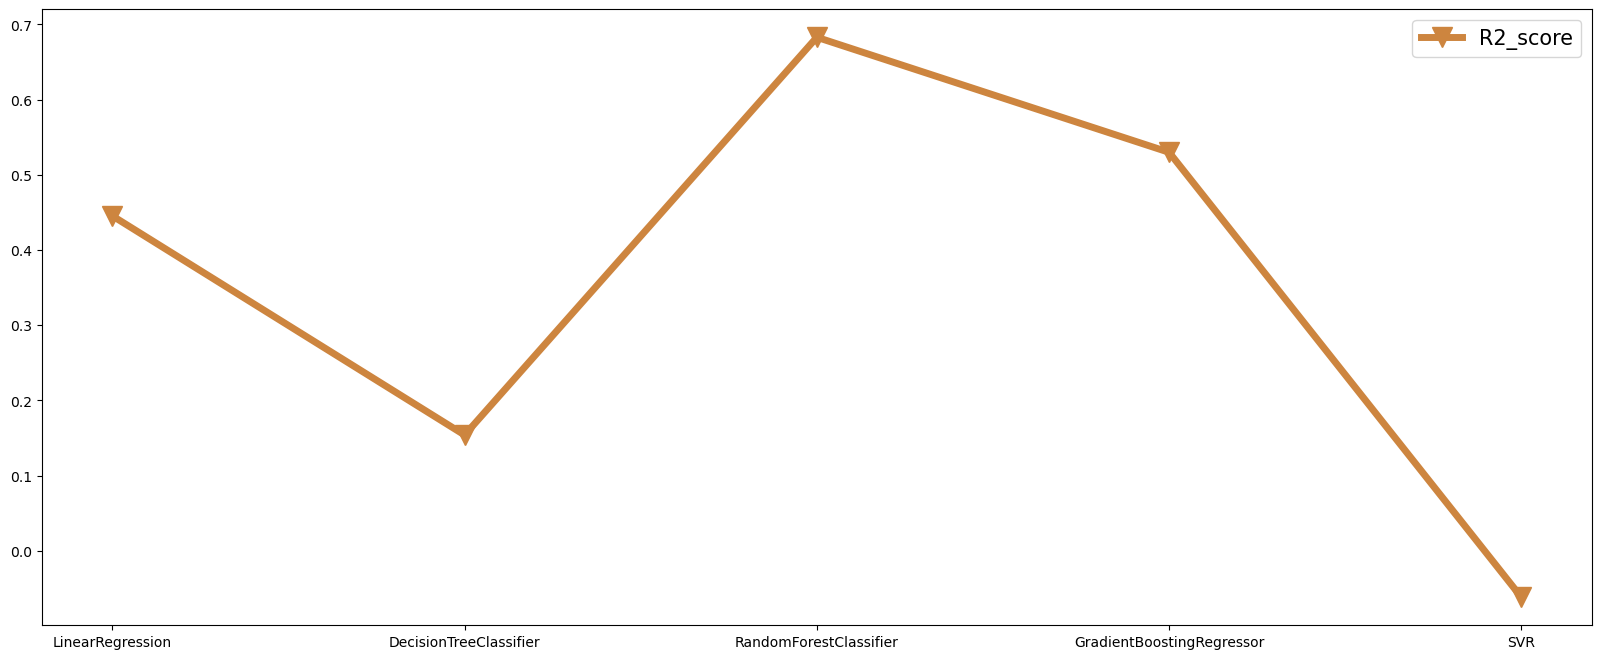

In [125]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.R2_score ,label='R2_score',lw=5,color='peru',marker='v',markersize = 15)
plt.legend(fontsize=15)
plt.show()

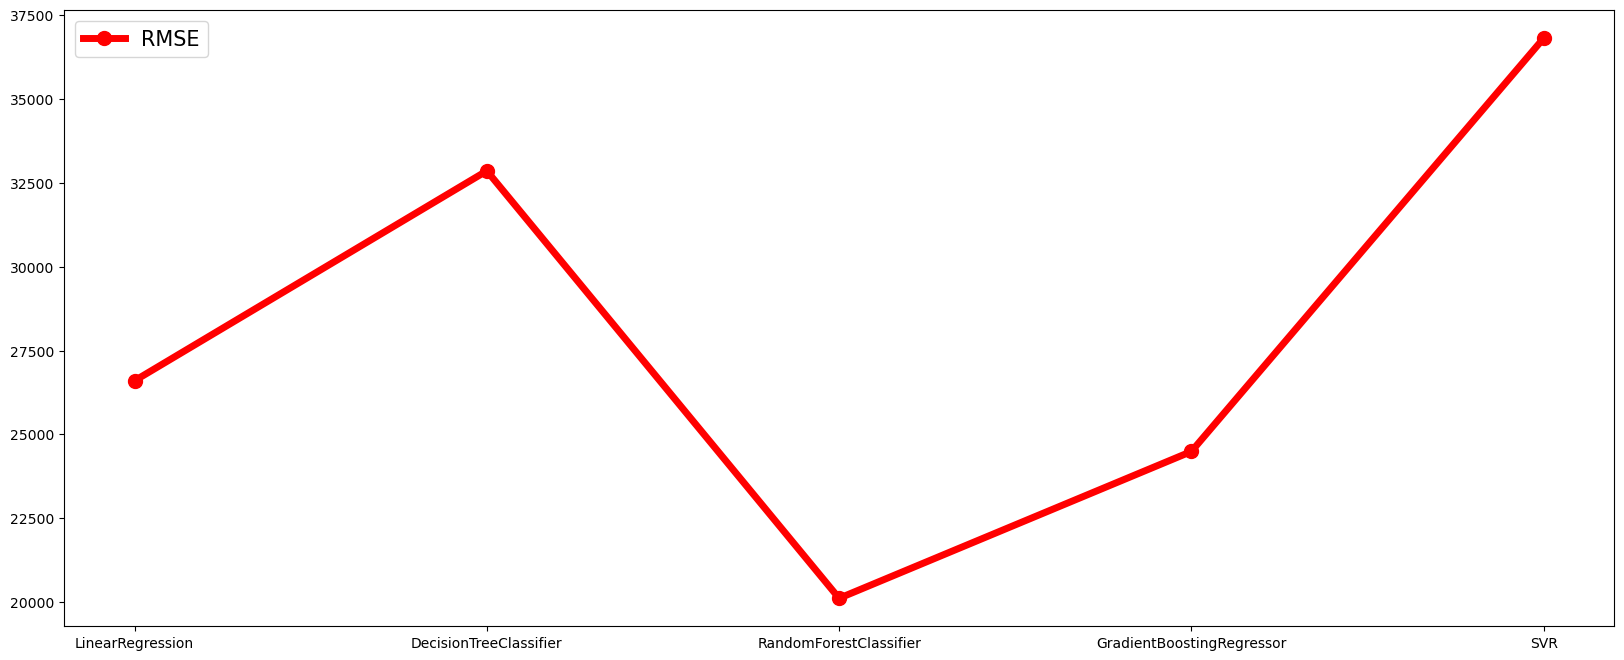

In [126]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()

In [127]:
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.6804676160234031

In [128]:
y_pred=model3.predict(X_test)

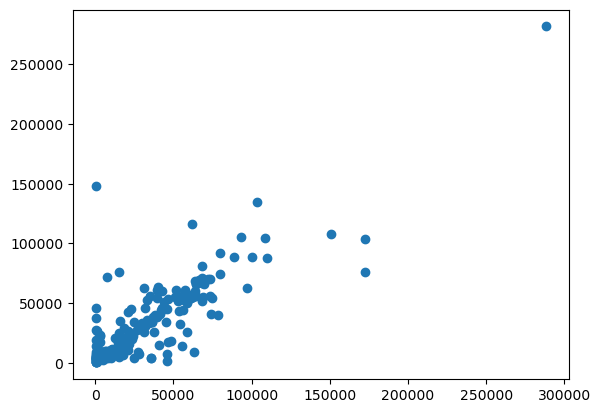

In [129]:
plt.scatter(y_test,y_pred)

we can the RandomForestClassifier perform the best

In [131]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(model3, file)